# Referensi yang Mungkin Berguna
1. Tutorial pandas dan membuat grafik https://www.youtube.com/watch?v=dcqPhpY7tWk
2. Tutorial pandas juga tapi tertulis https://www.geeksforgeeks.org/pandas-tutorial/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Baca data dari file .csv
1. Unduh loan_sanction_train.csv dari https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval
2. Gunakan pandas untuk membaca file tersebut
3. Print dataframe yang telah dibaca

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/loan_sanction_train.csv")
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

# Filter dan sort
1. Tampilkan data loan oleh seorang laki-laki!
2. Urutkan data berdasar jumlah pinjaman!
(cukup tampilkan hasil akhir dari dua perintah di atas)

In [ ]:
male_data = df.loc[df['Gender'] == 'Male']
print(male_data)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
607  LP002964   Male     Yes          2  Not Graduate            No   
608  LP002974   Male     Yes          0      Graduate            No   
610  LP002979   Male     Yes         3+      Graduate            No   
611  LP002983   Male     Yes          1      Graduate            No   
612  LP002984   Male     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1

In [ ]:
sorted_loanAmount = df.sort_values('LoanAmount', ascending = True)
print(sorted_loanAmount)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
568  LP002840  Female      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
94   LP001325    Male      No          0  Not Graduate            No   
133  LP001482    Male     Yes          0      Graduate           Yes   
555  LP002792    Male     Yes          1      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
479  LP002533    Male     Yes          2      Graduate            No   
524  LP002697    Male      No          0      Graduate            No   
550  LP002778    Male     Yes          2      Graduate           Yes   
551  LP002784    Male     Yes          1  Not Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
568             2378                0.0         9.0           

# Aggregating
1. Hitung rata-rata pendapatan dari peminjam!
2. Gender apa yang paling banyak mengajukan pinjaman, laki-laki atau perempuan?
3. Hitung rata-rata pinjaman yang diajukan untuk masing-masing area properti!

In [ ]:
mean_applicantIncome = df['ApplicantIncome'].mean()
print(mean_applicantIncome)

5403.459283387622


In [ ]:
count_gender = {}

for gender in df['Gender'].unique():
  count_gender[gender] = len(df.loc[df['Gender'] == gender])

if count_gender['Male'] > count_gender['Female']:
  print('Laki-laki mengajukan pinjaman lebih banyak.')
elif count_gender['Male'] < count_gender['Female']:
  print('Perempuan mengajukan pinjaman lebih banyak.')
else:
  print('Keduanya sama banyak.')

Laki-laki mengajukan pinjaman lebih banyak.


In [ ]:
print('Rata-rata pinjaman yang diajukan untuk properti area')
for propArea in df['Property_Area'].unique():
  print('\t{}: {}'.format(propArea, df.loc[df['Property_Area'] == propArea]['LoanAmount'].mean()))

Rata-rata pinjaman yang diajukan untuk properti area
	Urban: 142.19895287958116
	Rural: 152.2601156069364
	Semiurban: 145.50438596491227


# Membuat Grafik
1. Buatlah histogram untuk penghasilan peminjam, beri judul grafik, dan label untuk tiap sumbu yang jelas!
2. Buatlah pie chart untuk tingkat pendidikan para peminjam!

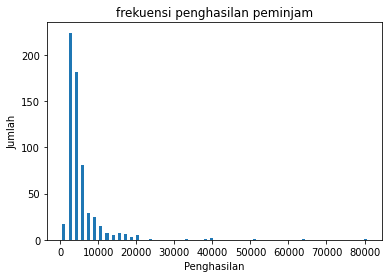

In [ ]:
plt.hist(df['ApplicantIncome'],rwidth=0.5, bins = 50)
plt.title('frekuensi penghasilan peminjam')
plt.xlabel('Penghasilan')
plt.ylabel('Jumlah')
plt.show()

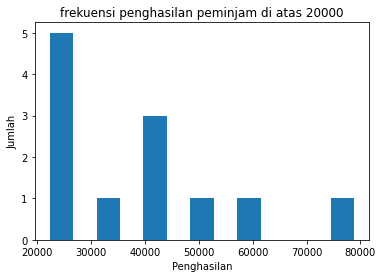

In [ ]:
plt.hist(df.loc[df['ApplicantIncome'] >= 20000]['ApplicantIncome'], rwidth= 0.5, bins = 7)
plt.title('frekuensi penghasilan peminjam di atas 20000')
plt.xlabel('Penghasilan')
plt.ylabel('Jumlah')
plt.show()

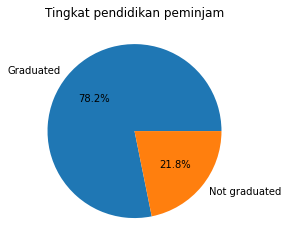

In [ ]:

plt.pie(df['Education'].value_counts(), autopct='%.1f%%', labels = ['Graduated', 'Not graduated'])
plt.title('Tingkat pendidikan peminjam')
plt.show()